## Final Project 

### Mushroom Classification Using KNN, RandomForest, Naive Bayes.

The goal of the project is to classify the type of a mushroom whether it is Edible or poisonous with given features like capshape,capsurface,gill attachement etc.
Finding Accuracy, Precision, Recall, F1 score to evaluate the model with for different classification algorithms.

In [1]:
#load neccessary modules
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

## Data Extraction

Data Extracted from Kaggle.Dataset contains 23 features with 8124 obeservations. All features are categorical with different types in each.

In [2]:
# importing Data 
path = '/Users/mummadi/Downloads/mushrooms.csv'
mashroom = pd.read_csv(path)
mashroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mashroom.shape

(8124, 23)

In [4]:
mashroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

## Data Cleaning

Dataset looks Clean so there is no need of cleaning or imputing or capping for any values.

In [5]:
mashroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
# To understand what types are there in each column. Just changged the abbrevations to full names in all columns.

a=mashroom['class']
for i in range(0,len(a)):
    if a[i]=="p":
        a[i]="poisonous"
    elif a[i]=="e":
        a[i]="edible"

a=mashroom['cap-shape']
for i in range(0,len(a)):
    if a[i]=="b":
        a[i]="bell"
    elif a[i]=="c":
        a[i]="conical"
    elif a[i]=="x":
        a[i]="convex"
    elif a[i]=="f":
        a[i]="flat"
    elif a[i]=="k":
        a[i]="knobbed"
    elif a[i]=="s":
        a[i]="sunken"

a=mashroom['cap-surface']
for i in range(0,len(a)):
    if a[i]=="f":
        a[i]="fibrous"
    elif a[i]=="g":
        a[i]="grooves"
    elif a[i]=="y":
        a[i]="scaly"
    elif a[i]=="s":
        a[i]="smooth"

a=mashroom['cap-color']
for i in range(0,len(a)):
    if a[i]=="n":
        a[i]="brown"
    elif a[i]=="b":
        a[i]="buff"
    elif a[i]=="c":
        a[i]="cinnamon"
    elif a[i]=="g":
        a[i]="gray"
    elif a[i]=="r":
        a[i]="green"
    elif a[i]=="p":
        a[i]="pink"
    elif a[i]=="u":
        a[i]="purple"
    elif a[i]=="e":
        a[i]="red"
    elif a[i]=="w":
        a[i]="white"
    elif a[i]=="y":
        a[i]="yellow"

a=mashroom['bruises']
for i in range(0,len(a)):
    if a[i]=="t":
        a[i]="yes"
    elif a[i]=="f":
        a[i]="no"
a=mashroom['odor']
for i in range(0,len(a)):
    if a[i]=="a":
        a[i]="almond"
    elif a[i]=="l":
        a[i]="anise"
    elif a[i]=="c":
        a[i]="creosote"
    elif a[i]=="y":
        a[i]="fishy"
    elif a[i]=="f":
        a[i]="foul"
    elif a[i]=="m":
        a[i]="musty"
    elif a[i]=="n":
        a[i]="none"
    elif a[i]=="p":
        a[i]="pungent"
    elif a[i]=="s":
        a[i]="spicy"

a=mashroom['gill-attachment']
for i in range(0,len(a)):
    if a[i]=="a":
        a[i]="attachment"
    elif a[i]=="d":
        a[i]="descending"
    elif a[i]=="f":
        a[i]="free"
    elif a[i]=="n":
        a[i]="notched"

a=mashroom['gill-spacing']
for i in range(0,len(a)):
    if a[i]=="c":
        a[i]="close"
    elif a[i]=="w":
        a[i]="crowded"
    elif a[i]=="d":
        a[i]="distant"

a=mashroom['gill-size']
for i in range(0,len(a)):
    if a[i]=="b":
        a[i]="broad"
    elif a[i]=="n":
        a[i]="narrow"

a=mashroom['gill-color']
for i in range(0,len(a)):
    if a[i]=="k":
        a[i]="black"
    elif a[i]=="n":
        a[i]="brown"
    elif a[i]=="b":
        a[i]="buff"
    elif a[i]=="h":
        a[i]="chocolate"
    elif a[i]=="g":
        a[i]="gray"
    elif a[i]=="r":
        a[i]="green"
    elif a[i]=="o":
        a[i]="orange"    
    elif a[i]=="p":
        a[i]="pink"
    elif a[i]=="u":
        a[i]="purple"
    elif a[i]=="e":
        a[i]="red"
    elif a[i]=="w":
        a[i]="white"
    elif a[i]=="y":
        a[i]="yellow"
    
a=mashroom['gill-size']
for i in range(0,len(a)):
    if a[i]=="b":
        a[i]="broad"
    elif a[i]=="n":
        a[i]="narrow"

a=mashroom['stalk-shape']
for i in range(0,len(a)):
    if a[i]=="e":
        a[i]="enlarging"
    elif a[i]=="t":
        a[i]="taping"

a=mashroom['stalk-root']
for i in range(0,len(a)):
    if a[i]=="b":
        a[i]="bulbous"
    elif a[i]=="c":
        a[i]="club"
    elif a[i]=="u":
        a[i]="cup"
    elif a[i]=="e":
        a[i]="equal"
    elif a[i]=="z":
        a[i]="rhizomorphs"
    elif a[i]=="r":
        a[i]="rooted"
    elif a[i]=="?":
        a[i]="missing"    
    
a=mashroom['stalk-surface-above-ring']
for i in range(0,len(a)):
    if a[i]=="f":
        a[i]="fibrous"
    elif a[i]=="y":
        a[i]="scaly"
    elif a[i]=="k":
        a[i]="silky"
    elif a[i]=="s":
        a[i]="smooth"
    
a=mashroom['stalk-surface-below-ring']
for i in range(0,len(a)):
    if a[i]=="f":
        a[i]="fibrous"
    elif a[i]=="y":
        a[i]="scaly"
    elif a[i]=="k":
        a[i]="silky"
    elif a[i]=="s":
        a[i]="smooth"

a=mashroom['stalk-color-above-ring']
for i in range(0,len(a)):
    if a[i]=="n":
        a[i]="brown"
    elif a[i]=="b":
        a[i]="buff"
    elif a[i]=="c":
        a[i]="cinnamon"
    elif a[i]=="g":
        a[i]="gray"
    elif a[i]=="o":
        a[i]="orange"    
    elif a[i]=="p":
        a[i]="pink"
    elif a[i]=="e":
        a[i]="red"
    elif a[i]=="w":
        a[i]="white"
    elif a[i]=="y":
        a[i]="yellow"

a=mashroom['stalk-color-below-ring']
for i in range(0,len(a)):
    if a[i]=="n":
        a[i]="brown"
    elif a[i]=="b":
        a[i]="buff"
    elif a[i]=="c":
        a[i]="cinnamon"
    elif a[i]=="g":
        a[i]="gray"
    elif a[i]=="o":
        a[i]="orange"    
    elif a[i]=="p":
        a[i]="pink"
    elif a[i]=="e":
        a[i]="red"
    elif a[i]=="w":
        a[i]="white"
    elif a[i]=="y":
        a[i]="yellow"

a=mashroom['veil-type']
for i in range(0,len(a)):
    if a[i]=="p":
        a[i]="partial"
    elif a[i]=="u":
        a[i]="genel"

a=mashroom['veil-color']
for i in range(0,len(a)):
    if a[i]=="n":
        a[i]="brown"
    elif a[i]=="o":
        a[i]="orange"    
    elif a[i]=="w":
        a[i]="white"
    elif a[i]=="y":
        a[i]="yellow"

a=mashroom['ring-number']
for i in range(0,len(a)):
    if a[i]=="n":
        a[i]="none"
    elif a[i]=="o":
        a[i]="one"
    elif a[i]=="t":
        a[i]="two"

a=mashroom['ring-type']
for i in range(0,len(a)):
    if a[i]=="c":
        a[i]="cobwebby"
    elif a[i]=="e":
        a[i]="evanescent"
    elif a[i]=="f":
        a[i]="flaring"
    elif a[i]=="l":
        a[i]="large"
    elif a[i]=="n":
        a[i]="none"    
    elif a[i]=="p":
        a[i]="pendant"
    elif a[i]=="s":
        a[i]="sheathing"
    elif a[i]=="z":
        a[i]="zone"

a=mashroom['spore-print-color']
for i in range(0,len(a)):
    if a[i]=="k":
        a[i]="black"
    elif a[i]=="n":
        a[i]="brown"
    elif a[i]=="b":
        a[i]="buff"
    elif a[i]=="h":
        a[i]="chocolate"
    elif a[i]=="r":
        a[i]="green"
    elif a[i]=="o":
        a[i]="orange"    
    elif a[i]=="u":
        a[i]="purple"
    elif a[i]=="w":
        a[i]="white"
    elif a[i]=="y":
        a[i]="yellow"

a=mashroom['population']
for i in range(0,len(a)):
    if a[i]=="a":
        a[i]="abundant"
    elif a[i]=="c":
        a[i]="clustered"
    elif a[i]=="n":
        a[i]="numerous"
    elif a[i]=="s":
        a[i]="scattered"
    elif a[i]=="v":
        a[i]="several"    
    elif a[i]=="y":
        a[i]="solitary"

a=mashroom['habitat']
for i in range(0,len(a)):
    if a[i]=="g":
        a[i]="grasses"
    elif a[i]=="l":
        a[i]="leaves"
    elif a[i]=="m":
        a[i]="meadows"
    elif a[i]=="p":
        a[i]="paths"
    elif a[i]=="u":
        a[i]="urban"    
    elif a[i]=="w":
        a[i]="waste"
    elif a[i]=="d":
        a[i]="woods"
        
#ahh... finally we have done it... 
mashroom.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,yes,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,yes,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,edible,bell,scaly,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,edible,bell,smooth,yellow,yes,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


In [12]:
import numpy as np
mash_cap = pd.crosstab(mashroom["class"], mashroom["cap-shape"], rownames = ['class'], colnames = ['cap-shape'])
#  y  a  b

In [13]:
#cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
mash_cap

cap-shape,bell,conical,convex,flat,knobbed,sunken
class,,,,,,
edible,404,0,1948,1596,228,32
poisonous,48,4,1708,1556,600,0


In [14]:
# Target and input features
mashroom_xtrain = mashroom.drop(["class"],axis = 1)
mashroom_ytrain = mashroom["class"]   

In [15]:
# to check in tabluar format between each input to target variable
for each in mashroom_xtrain:
    each = str(each)
    print(pd.DataFrame(pd.crosstab(mashroom_xtrain[each], mashroom["class"], rownames = [each], colnames = ["class"])))

class      edible  poisonous
cap-shape                   
bell          404         48
conical         0          4
convex       1948       1708
flat         1596       1556
knobbed       228        600
sunken         32          0
class        edible  poisonous
cap-surface                   
fibrous        1560        760
grooves           0          4
scaly          1504       1740
smooth         1144       1412
class      edible  poisonous
cap-color                   
brown        1264       1020
buff           48        120
cinnamon       32         12
gray         1032        808
green          16          0
pink           56         88
purple         16          0
red           624        876
white         720        320
yellow        400        672
class    edible  poisonous
bruises                   
no         1456       3292
yes        2752        624
class     edible  poisonous
odor                       
almond       400          0
anise        400          0
creosote      

## Data Visualization

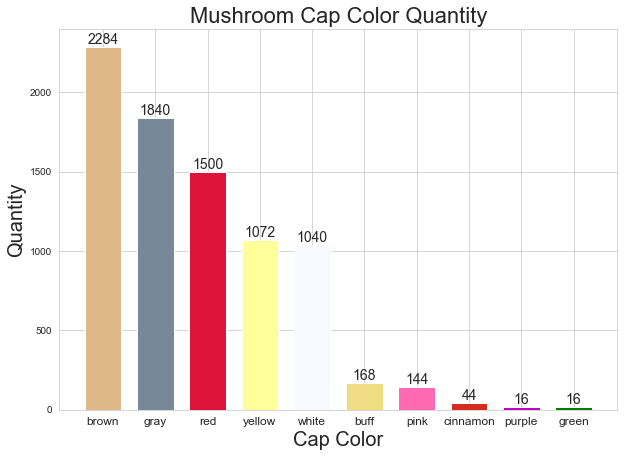

In [16]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = mashroom['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars. 

### Visualization to determine Feature importance
Cramers V is a measure of associateion between variables. It uses Pearsons Chisquared statistic to find correlation.Cramers V value varies between 0 to 1. If 0 no association, if 1 strong association. We plot a graph to visualize the effect of each feature on the label class. Feature odor has 0.9 Cramers v value, implying a strong influence on the dependent variable.

Theils U is another method to measure the association. It is called as uncertainity coefficient.If a given value for x how many states are possible values can y take,how many times it will occur is called as conditional entropy and Theils U is based on that.Theils U is asymetric and the probability of x given y is different from probability of y given x.

Below visualization are generated to find given a feature what is the association for edible or poisonous to occur.From both Cramers V and Theils U, we understand odor,spore-print-color,gill-color,ring type are the top four important features to determine the label

In [17]:
! pip install dython
import dython.nominal as dm
def generate_freq_heatmaps(feature):
    wild_ct = pd.crosstab(mashroom[feature], 
                          mashroom['class'])

    wild_ct_pct = wild_ct.apply(lambda r: r/r.sum(), axis=0)
    wild_ct_pct2 = wild_ct.apply(lambda r: r/r.sum(), axis=1)
    
    cram_v = dm.cramers_v(mashroom[feature], mashroom['class'])
    t_u_given_class = dm.theils_u(mashroom[feature], mashroom['class'])
    t_u_given_feature = dm.theils_u(mashroom['class'], mashroom[feature])
    
    plt.figure(figsize=(12,10))

    ax1 = plt.subplot2grid((3,2), (0, 0), colspan=2, 
                title=f"Overall Count of {feature} \n Cramer's V: {cram_v:.3f}")
    ax2 = plt.subplot2grid((3,2), (1, 0), 
                title=f"P({feature}|class) \n Theil's U: {t_u_given_class:.3f}")
    ax3 = plt.subplot2grid((3,2), (1, 1), 
                title=f"P(class|{feature}) \n Theil's U: {t_u_given_feature:.3f}")

    sns.heatmap(wild_ct, cmap=sns.color_palette("BuGn"), annot=True, fmt='g', ax=ax1)
    sns.heatmap(wild_ct_pct, cmap=sns.color_palette("GnBu"), annot=True, fmt='.0%', ax=ax2)
    sns.heatmap(wild_ct_pct2, cmap=sns.color_palette("GnBu"), annot=True, fmt='.0%', ax=ax3)

    plt.tight_layout()
    plt.show()

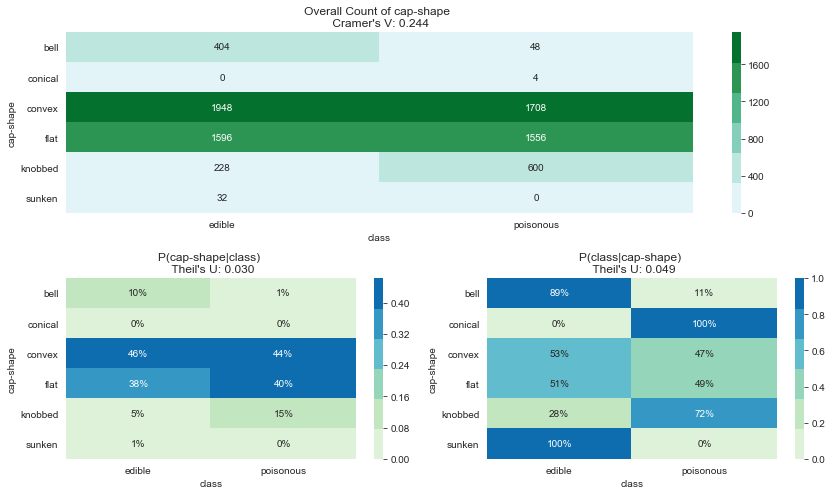

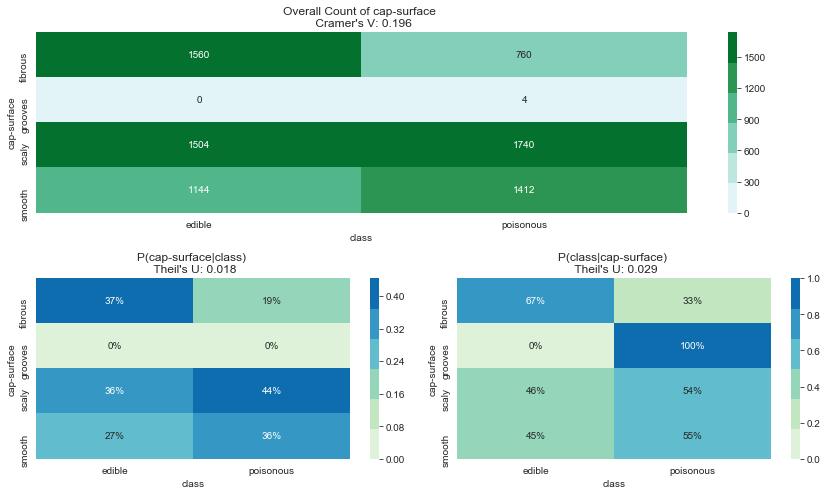

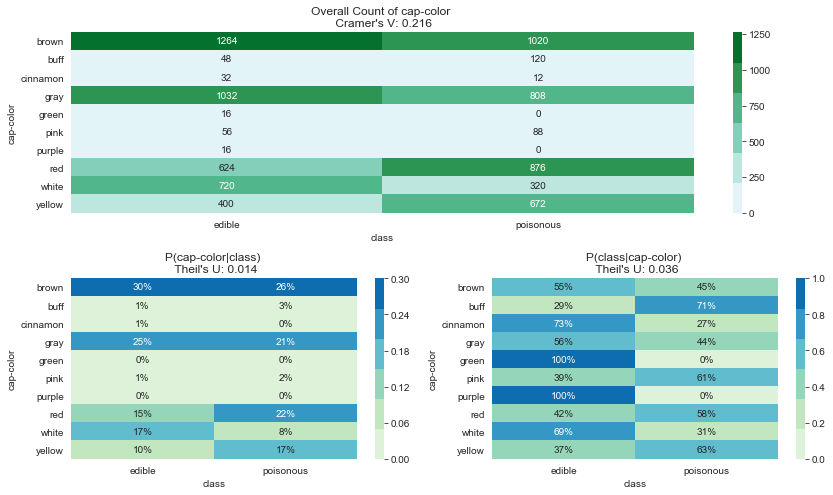

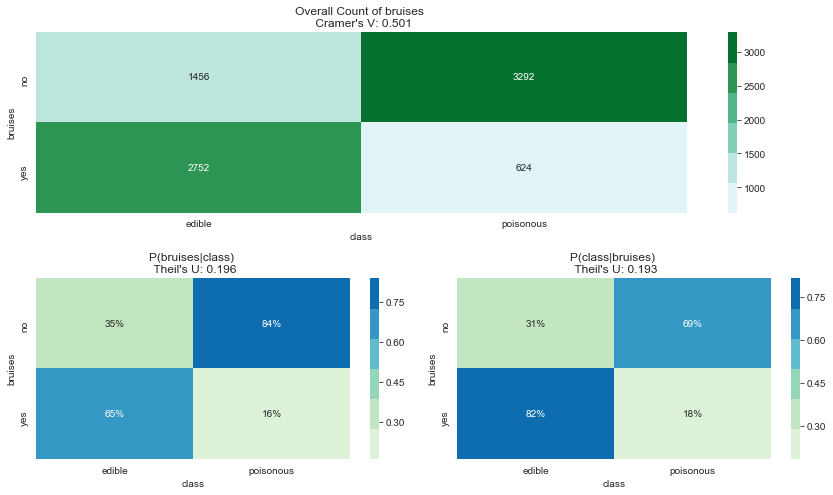

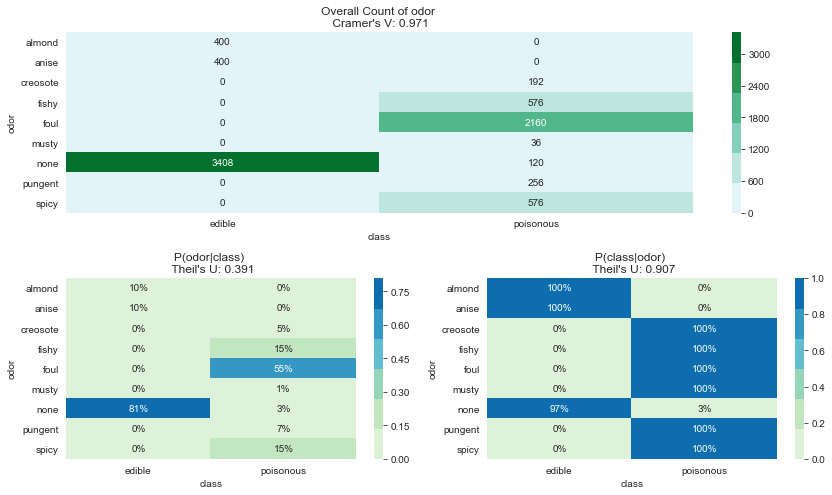

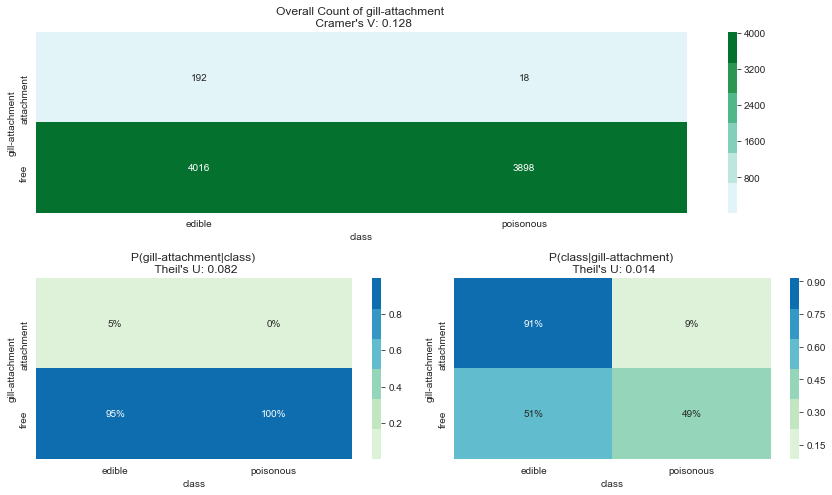

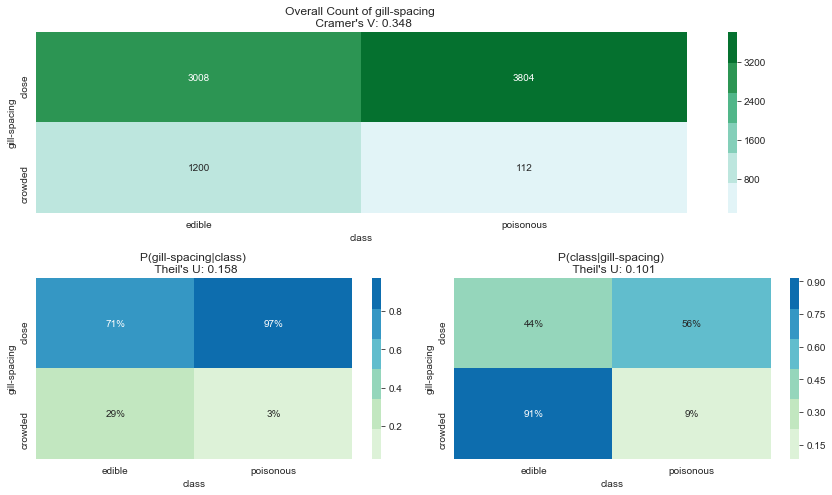

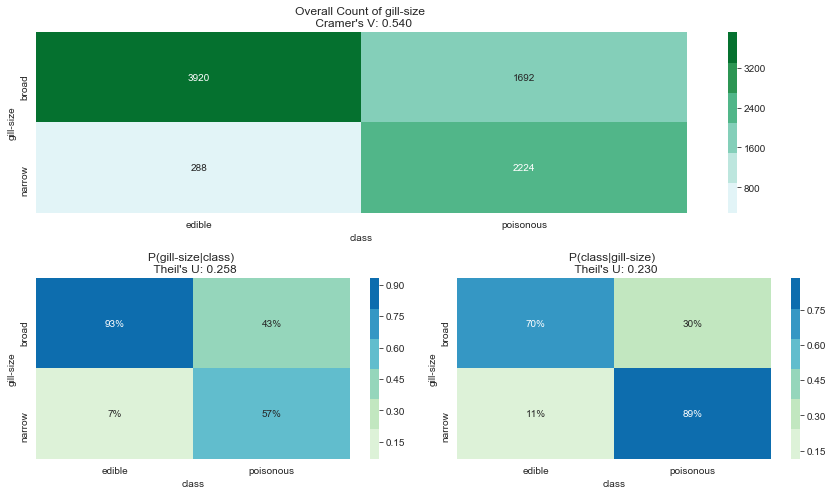

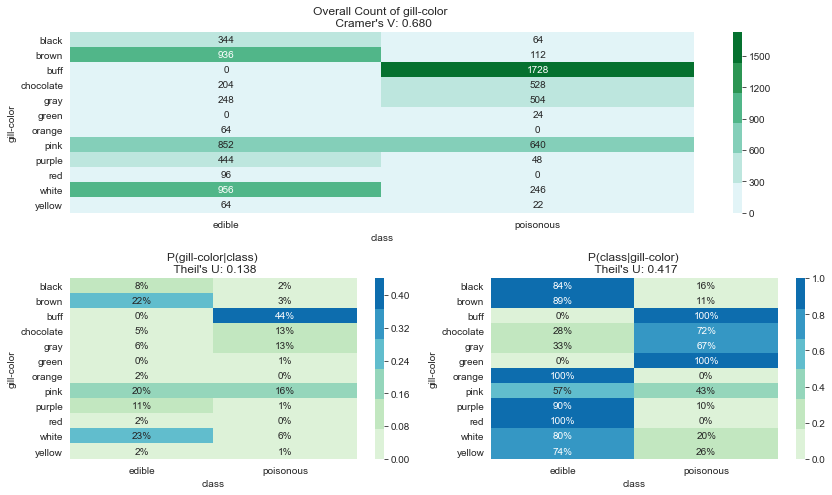

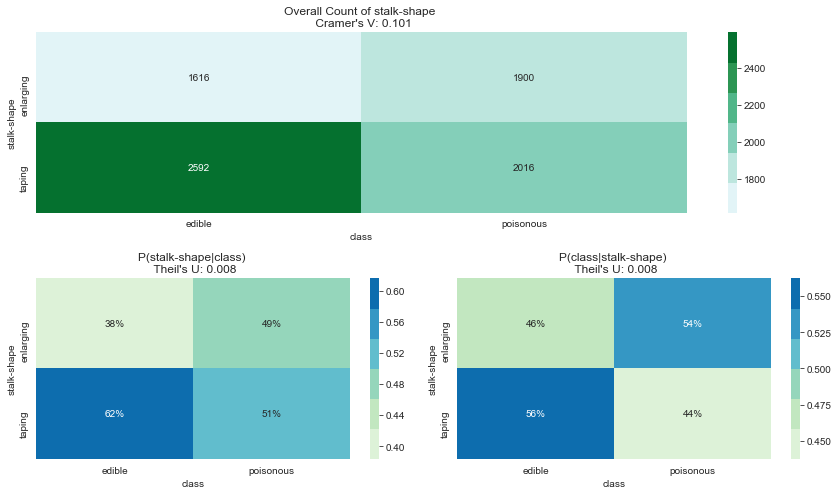

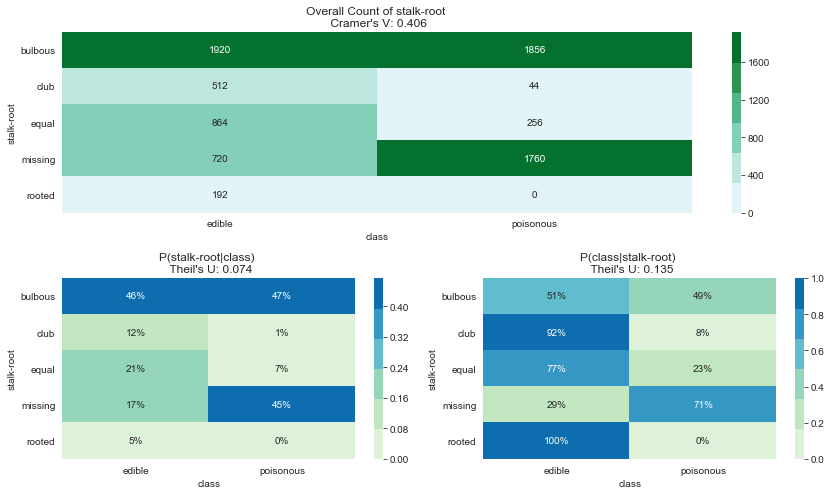

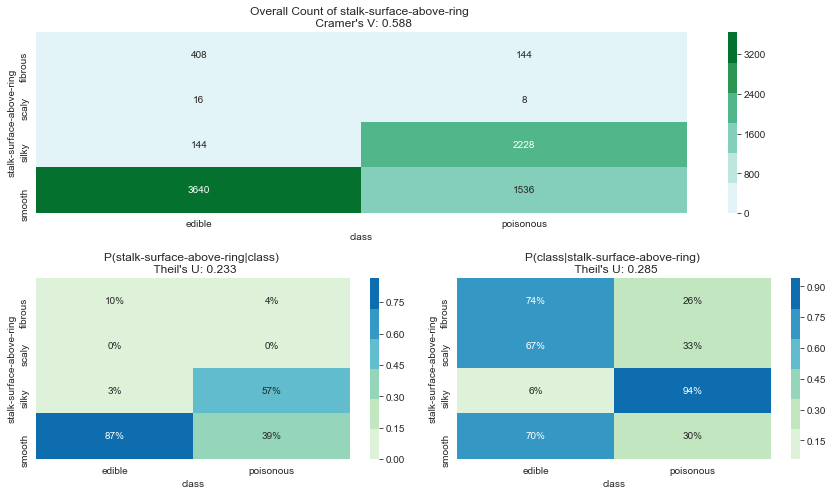

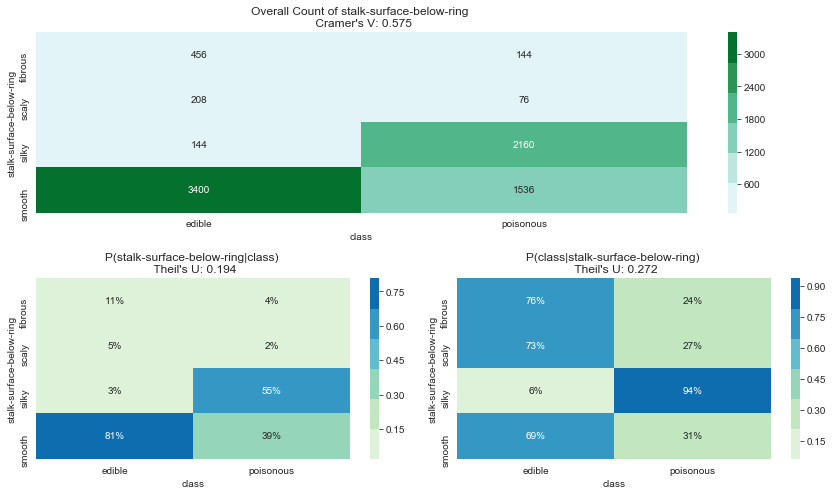

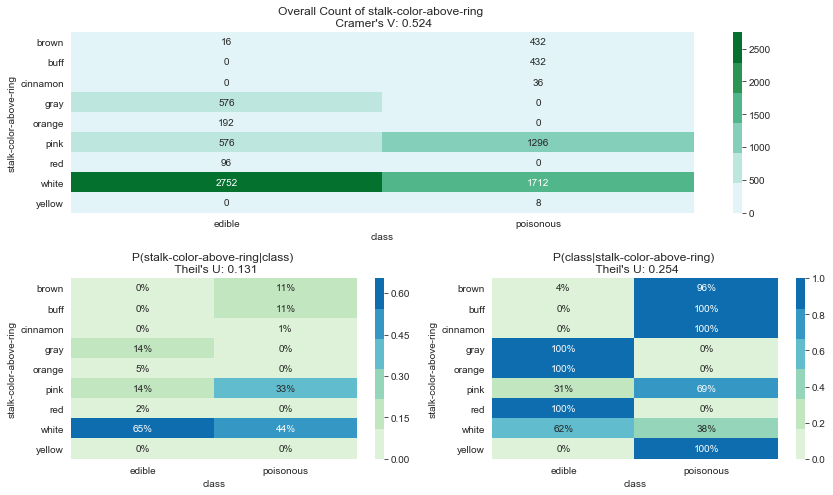

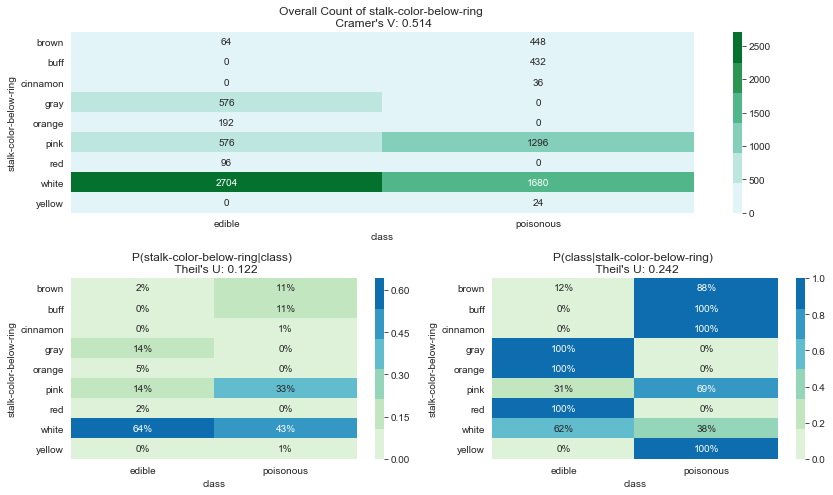

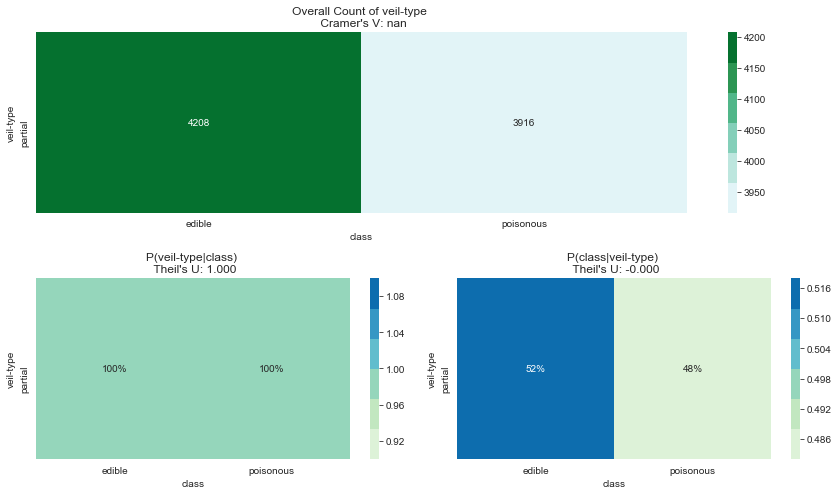

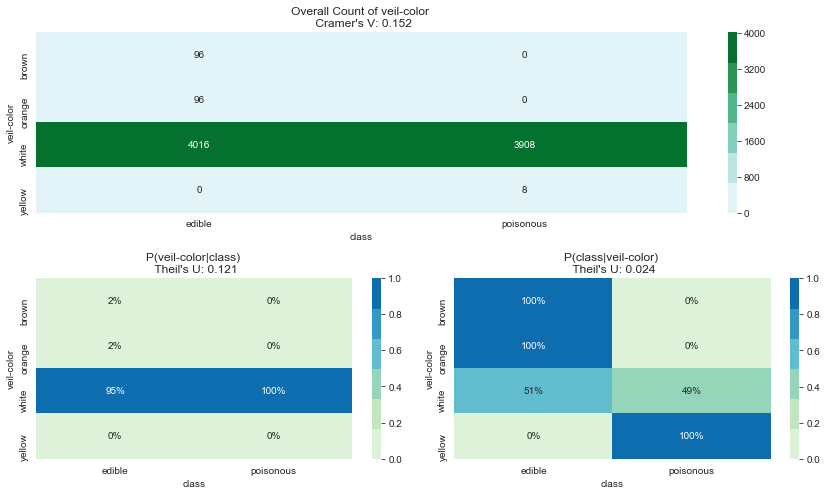

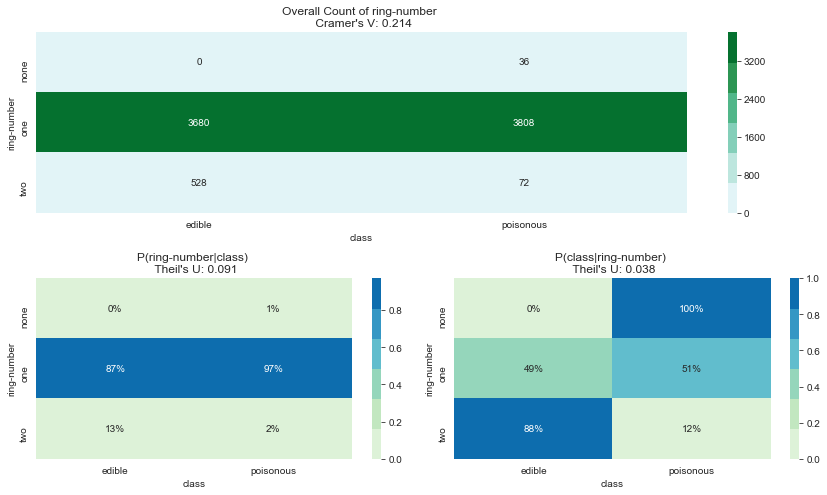

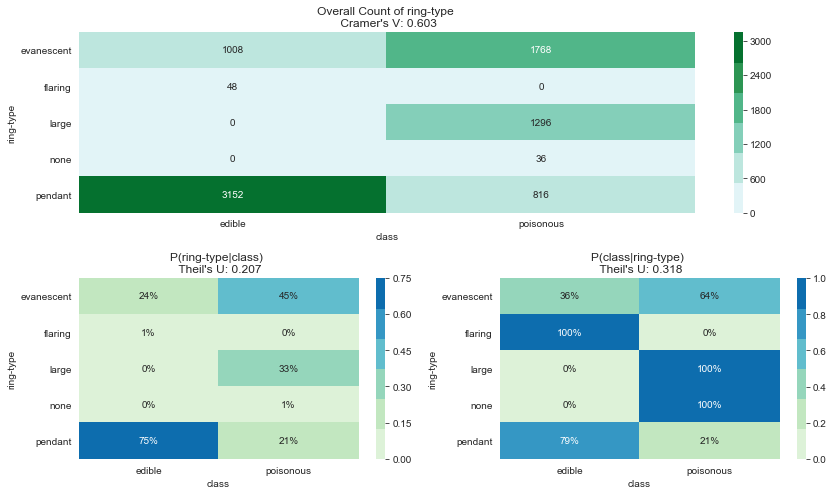

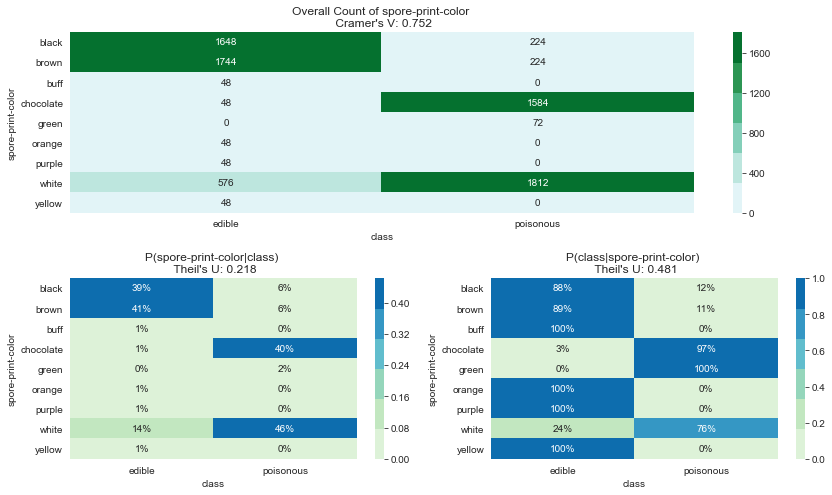

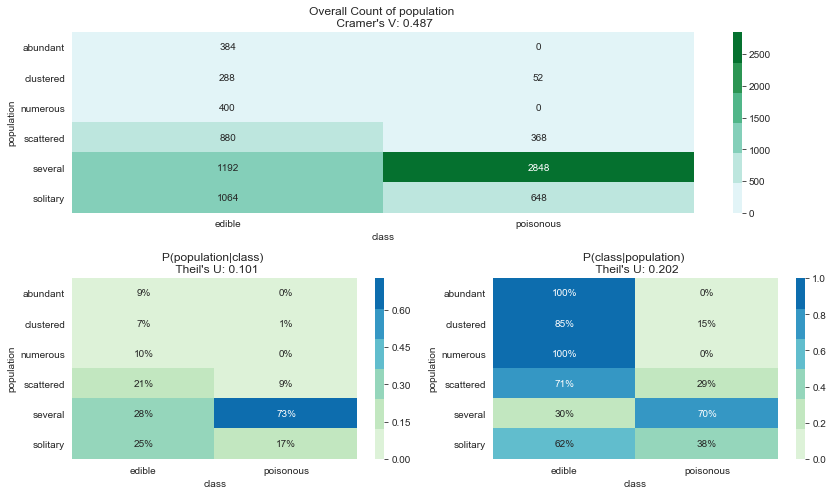

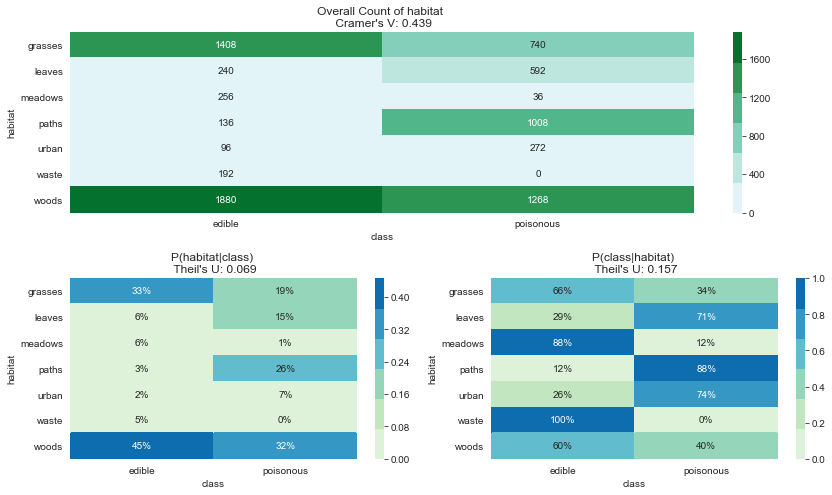

In [57]:
features = [col for col in mashroom.columns if col != 'class']

for feature in features:
    generate_freq_heatmaps(feature)

### Stacked Bar graph
The distribution of proportion of label class in each feature is shown below as a stacked bar graph. Of all the features odor has good distinction or separation between the two levels in label class among its values. Stalk-shape is the least information gain feature as it has both the edible and poisonous equally distributed in its two levels thus making it difficult to identify the label based on its value.

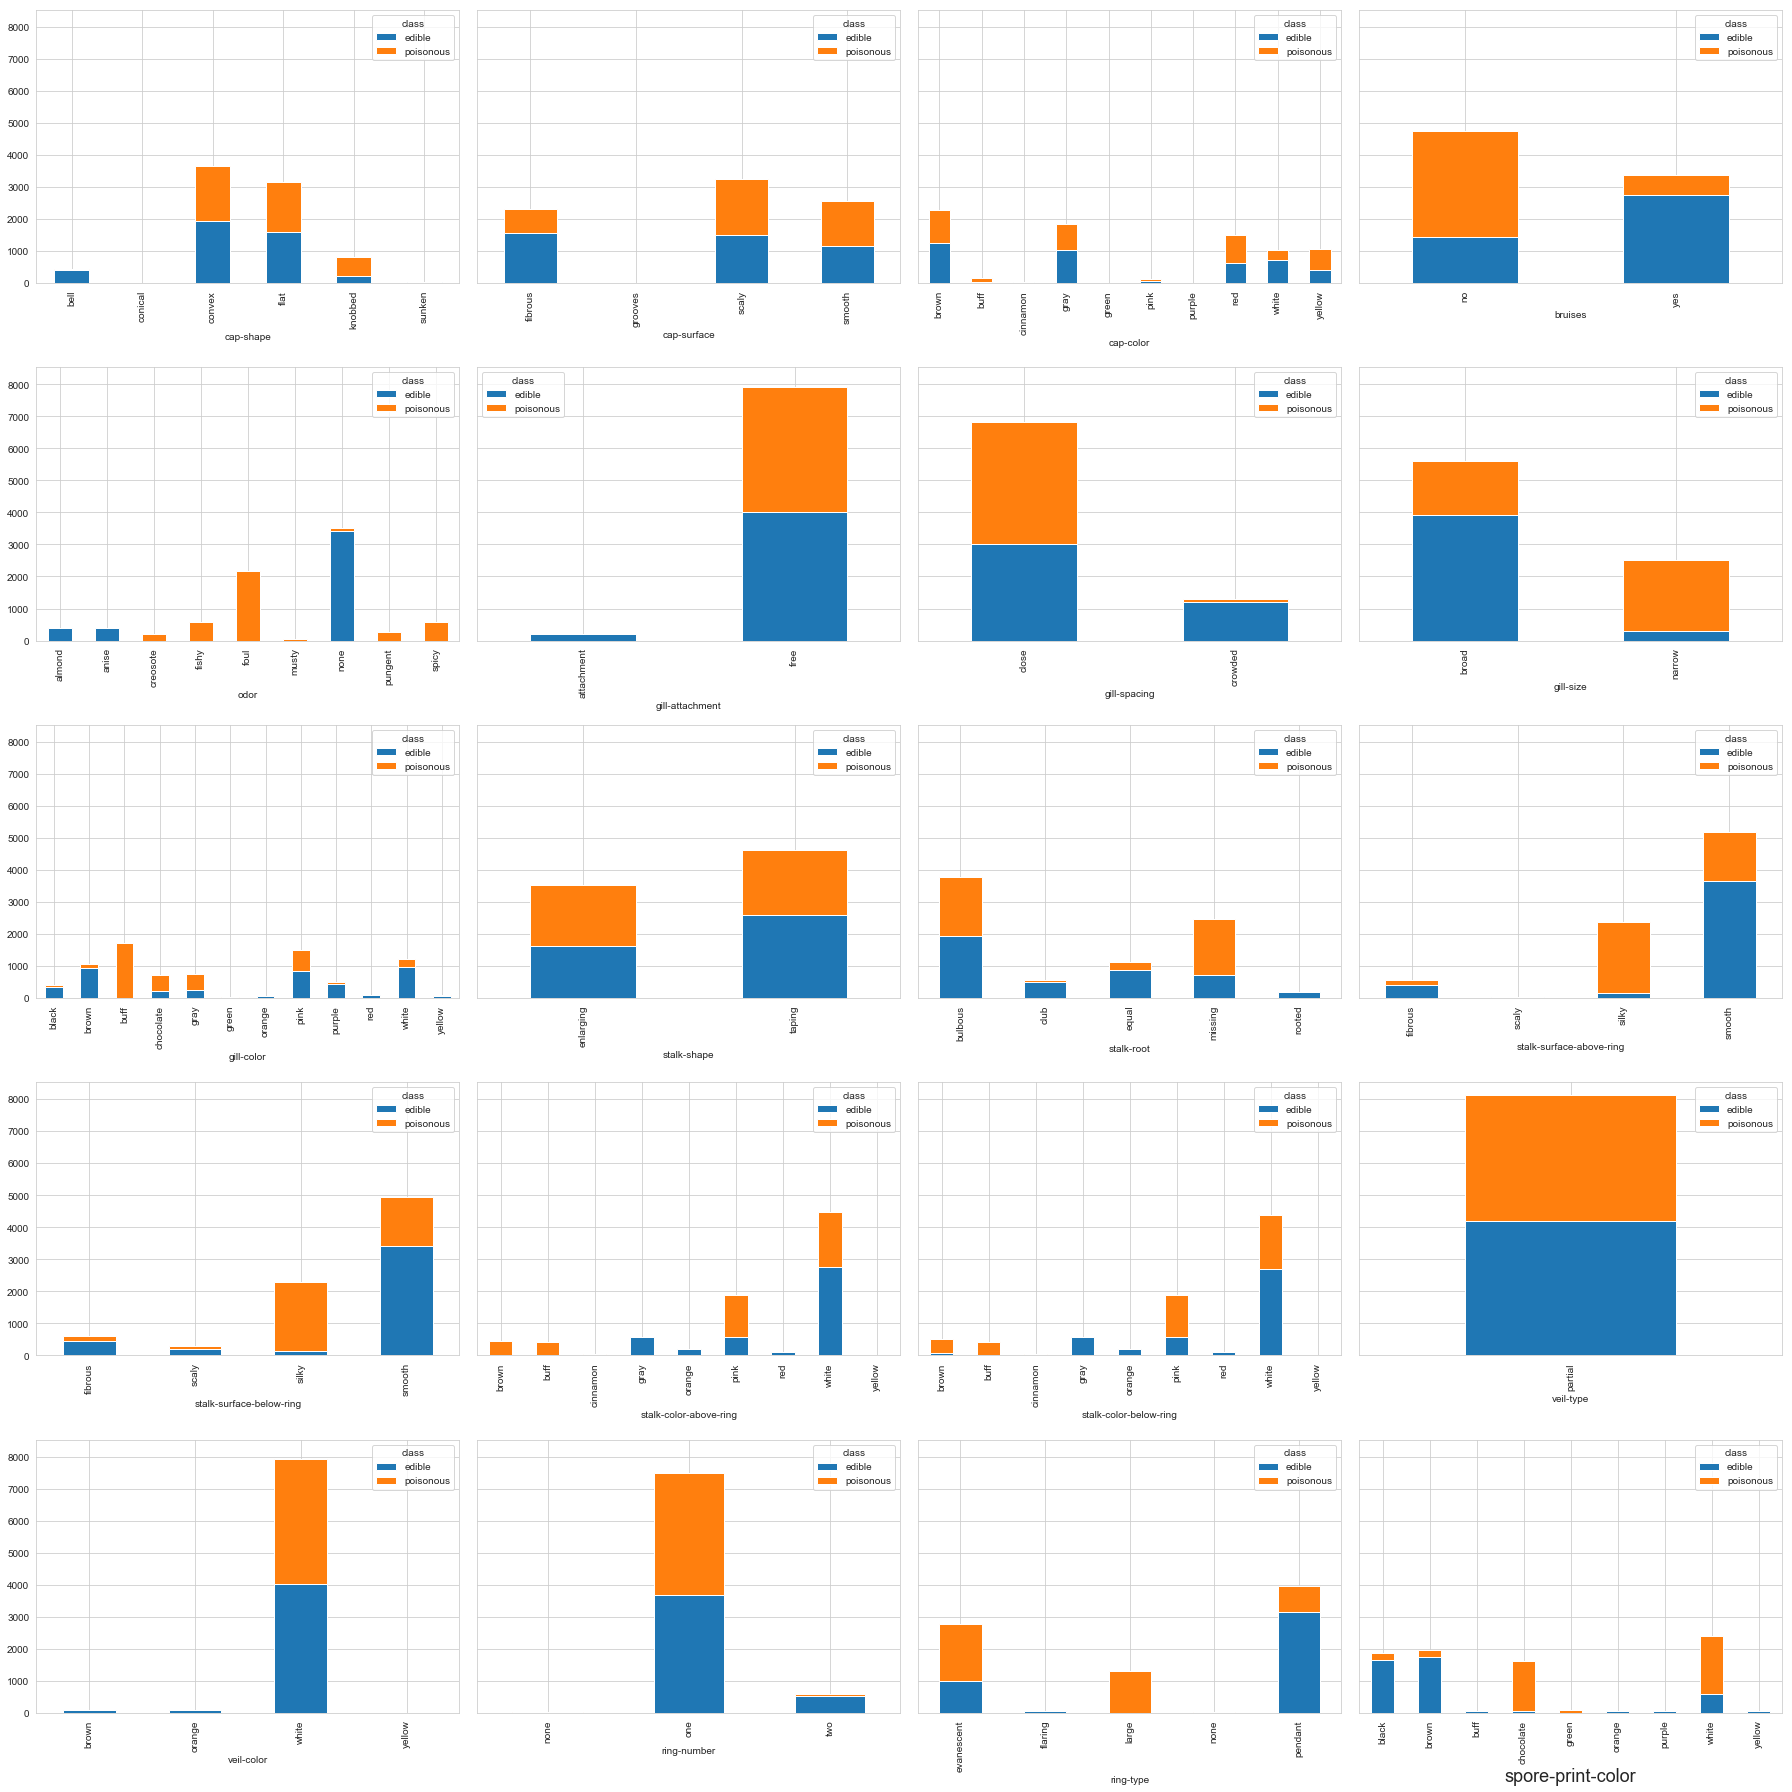

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25,25),sharey=True)
#fig.subplots_adjust(hspace=1.2, wspace=0.6)


for ax, col in zip(axes[0], mashroom.iloc[:,1:].columns):
    pd.crosstab(mashroom[col], mashroom['class']).plot.bar(stacked=True, ax = ax)
    plt.xlabel(col, fontsize=18)
    #ax.set_title(col)
for ax, col in zip(axes[1], mashroom.iloc[:,5:].columns):
    pd.crosstab(mashroom[col], mashroom['class']).plot.bar(stacked=True, ax = ax)
    plt.xlabel(col, fontsize=18)
    #ax.set_title(col)
for ax, col in zip(axes[2], mashroom.iloc[:,9:].columns):
    pd.crosstab(mashroom[col], mashroom['class']).plot.bar(stacked=True, ax = ax)
    plt.xlabel(col, fontsize=18)
    #ax.set_title(col)
for ax, col in zip(axes[3], mashroom.iloc[:,13:].columns):
    pd.crosstab(mashroom[col], mashroom['class']).plot.bar(stacked=True, ax = ax)
    plt.xlabel(col, fontsize=18)
    #ax.set_title(col)
for ax, col in zip(axes[4], mashroom.iloc[:,17:].columns):
    pd.crosstab(mashroom[col], mashroom['class']).plot.bar(stacked=True, ax = ax)
    plt.xlabel(col, fontsize=18)
    #ax.set_title(col)


#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
plt.tight_layout()

## Dummy Encoding

All are categorical variables. model can not understand categorical so converted to dmmies.

In [19]:
# Dummy Encoding
from sklearn.preprocessing import LabelEncoder
mashroom_ytrain = mashroom["class"]
mashroom_xtrain = mashroom.drop(["class"],axis = 1)

le = LabelEncoder()
mashroom_ytrain = le.fit_transform(mashroom_ytrain)
#mashroom_ytrain.head()

encoded = pd.get_dummies(mashroom_xtrain).apply(pd.to_numeric)
type(encoded)

pandas.core.frame.DataFrame

In [20]:
# label encoding for Target Variable
mashroom_ytrain
le = LabelEncoder()
mashroom_ytrain1 = le.fit_transform(mashroom_ytrain)
print(mashroom_ytrain1)

[1 0 0 ... 0 1 0]


In [21]:
encoded.columns

Index(['cap-shape_bell', 'cap-shape_conical', 'cap-shape_convex',
       'cap-shape_flat', 'cap-shape_knobbed', 'cap-shape_sunken',
       'cap-surface_fibrous', 'cap-surface_grooves', 'cap-surface_scaly',
       'cap-surface_smooth',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=117)

## Splitting the Data

Splitting the data to 80% training and 205 testing.

In [22]:
# split the data usin train, test, split method from sklearn.
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(encoded,mashroom_ytrain,test_size=0.20, random_state=123)

In [23]:
#imporing the randomforest classifier from sklearn ensemble.
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
# training the model
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)
metrics.accuracy_score(y_test,rfc_predict)

1.0

In [25]:
# confusion matrix values for the model
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, rfc_predict))  
print(classification_report(y_test, rfc_predict))  

[[863   0]
 [  0 762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# Instantiate: create object
gnb = GaussianNB()

# Fit
gnb.fit(X_train, y_train)

# Predict
y_pred = gnb.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.955076923076923

In [28]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[791  72]
 [  1 761]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       863
           1       0.91      1.00      0.95       762

   micro avg       0.96      0.96      0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [29]:
#importing the model from sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# training the model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(X_train,y_train)
#knn.fit(X_train,y_train)

# testing the model
y_pred = knn.predict(X_test)

# checking the accuaracy of the model
scores = metrics.accuracy_score(y_test,y_pred)
print(scores)

1.0


In [30]:
# confusion matrix values for the model
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[863   0]
 [  0 762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Summary

For mashroom Classification, the Random forest classifier and K nearest neighbours predicting with 100% accuracy. But Naive bayes is not giving 100% accuaracy. it means there must be the features which are correlated each other. because naive bayes thinking features are independent.becuase of that it might not giving accurate results.So this Dataset we can use randomforest and K nearest neighbours with best k value.